In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Custom color palette
colors = {'setosa': '#FF6B6B', 'versicolor': '#4ECDC4', 'virginica': '#45B7D1'}
plt.style.use('seaborn-v0_8-whitegrid')  # Clean grid background

In [2]:
# Display first 5 rows
print("First 5 rows:")
iris_df.head()

First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Check for missing values
print("\nMissing values:")
iris_df.isnull().sum()


Missing values:


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [4]:
# Basic statistics
print("\nSummary statistics:")
iris_df.describe()


Summary statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


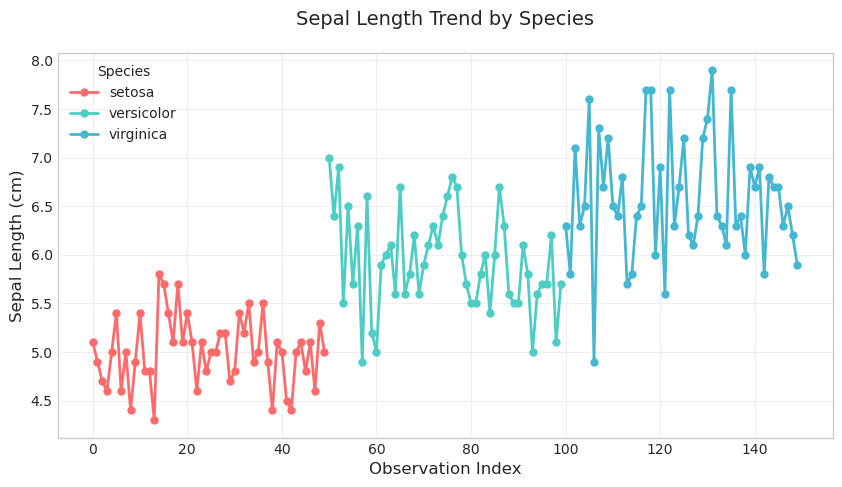

In [5]:
plt.figure(figsize=(10, 5))
for species in iris_df['species'].unique():
    species_data = iris_df[iris_df['species'] == species]
    plt.plot(
        species_data['sepal length (cm)'], 
        label=species, 
        color=colors[species],
        linewidth=2,
        marker='o',
        markersize=5
    )
plt.title('Sepal Length Trend by Species', fontsize=14, pad=20)
plt.xlabel('Observation Index', fontsize=12)
plt.ylabel('Sepal Length (cm)', fontsize=12)
plt.legend(title='Species', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

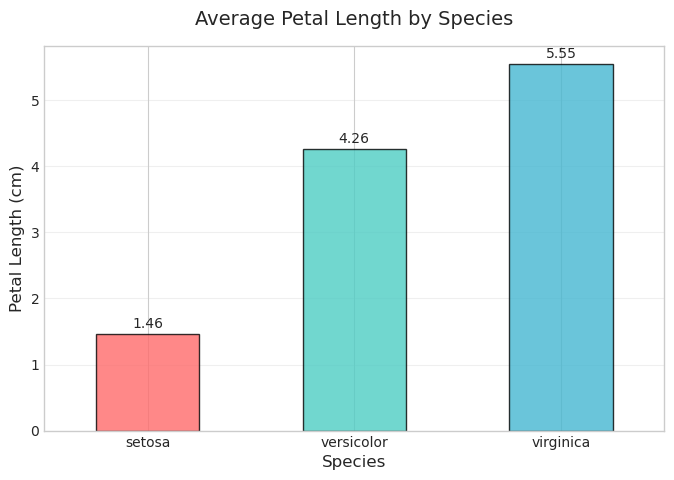

In [6]:
avg_petal = iris_df.groupby('species')['petal length (cm)'].mean()

plt.figure(figsize=(8, 5))
avg_petal.plot(
    kind='bar', 
    color=[colors[sp] for sp in avg_petal.index],
    edgecolor='black',
    alpha=0.8
)
plt.title('Average Petal Length by Species', fontsize=14, pad=15)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Petal Length (cm)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, val in enumerate(avg_petal):
    plt.text(i, val + 0.1, f'{val:.2f}', ha='center', fontsize=10)

plt.show()

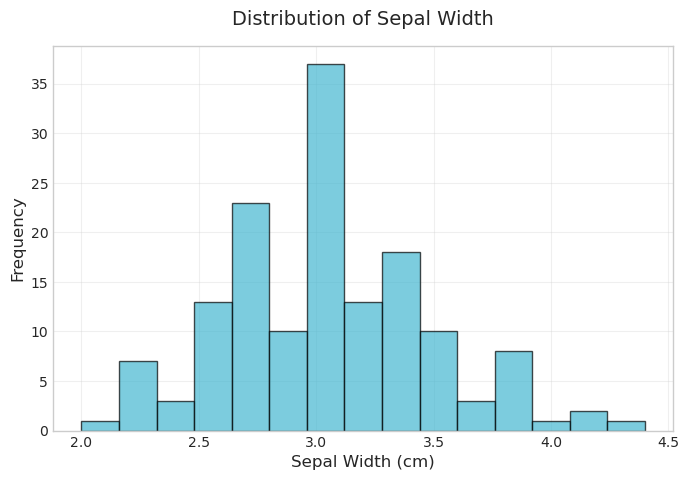

In [7]:
plt.figure(figsize=(8, 5))
iris_df['sepal width (cm)'].hist(
    bins=15,
    color='#45B7D1',
    edgecolor='black',
    alpha=0.7
)
plt.title('Distribution of Sepal Width', fontsize=14, pad=15)
plt.xlabel('Sepal Width (cm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

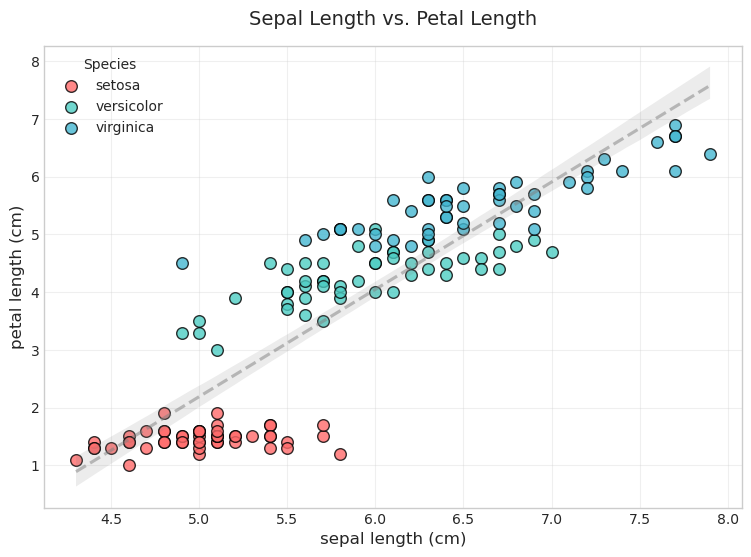

In [8]:
plt.figure(figsize=(9, 6))
for species, color in colors.items():
    species_data = iris_df[iris_df['species'] == species]
    plt.scatter(
        species_data['sepal length (cm)'], 
        species_data['petal length (cm)'], 
        color=color,
        label=species,
        s=70,
        edgecolor='black',
        alpha=0.8
    )
plt.title('Sepal Length vs. Petal Length', fontsize=14, pad=15)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Petal Length (cm)', fontsize=12)
plt.legend(title='Species', fontsize=10)
plt.grid(alpha=0.3)

# Add a trendline (optional)
sns.regplot(
    x='sepal length (cm)',
    y='petal length (cm)',
    data=iris_df,
    scatter=False,
    color='gray',
    line_kws={'linestyle':'--', 'alpha':0.5}
)

plt.show()

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


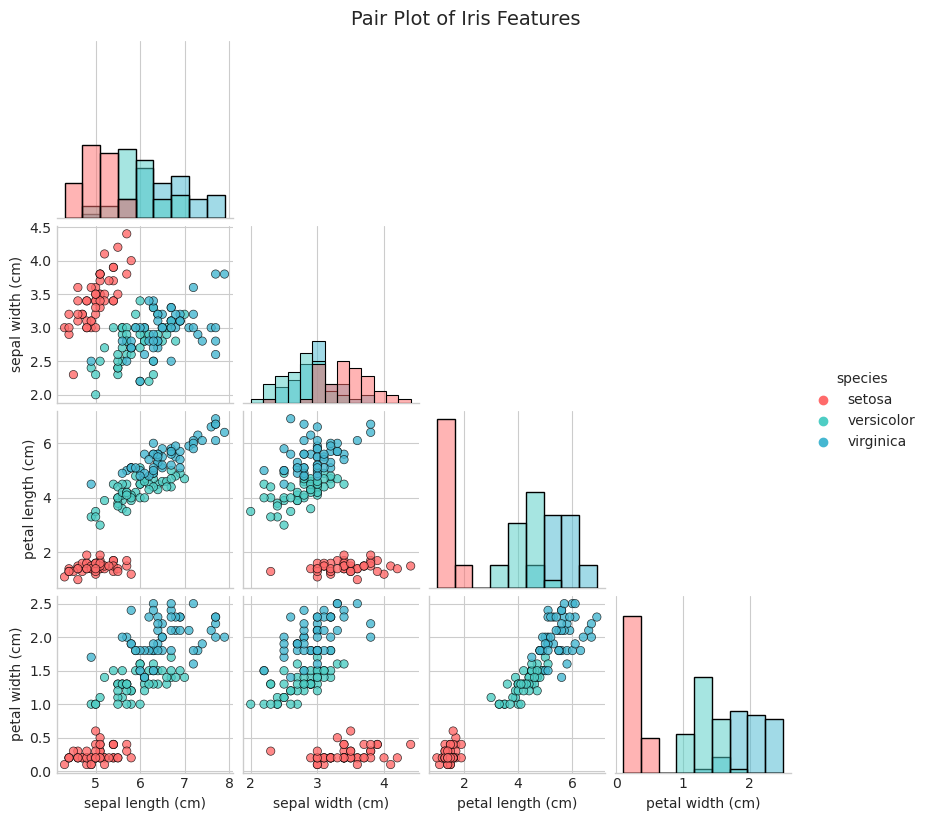

In [9]:
sns.pairplot(
    iris_df, 
    hue='species', 
    palette=colors,
    diag_kind='hist',
    corner=True,
    plot_kws={'alpha': 0.8, 'edgecolor': 'black'},
    height=2
)
plt.suptitle('Pair Plot of Iris Features', y=1.02, fontsize=14)
plt.show()

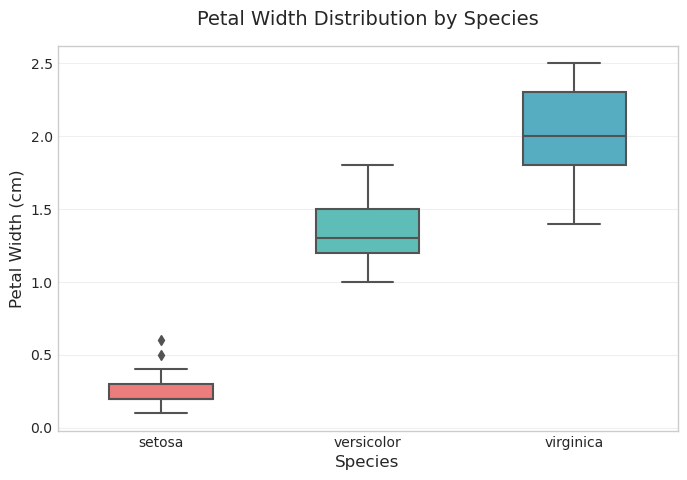

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=iris_df,
    x='species',
    y='petal width (cm)',
    palette=colors,
    width=0.5,
    linewidth=1.5
)
plt.title('Petal Width Distribution by Species', fontsize=14, pad=15)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Petal Width (cm)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()